In [6]:
import mdtraj as md
import numpy as np

# Load trajectory and compute phi and psi
trajectory = md.load('trajectory.xtc', top='md.gro')
phi_indices = md.compute_phi(trajectory)
psi_indices = md.compute_psi(trajectory)

phi_angles = phi_indices[0] * (180 / np.pi)  # Convert to degrees
psi_angles = psi_indices[0] * (180 / np.pi)  # Convert to degrees

# Save the phi and psi angles
np.savetxt('phi_psi_300.txt', np.column_stack((phi_angles, psi_angles)))


FileNotFoundError: [Errno 2] No such file or directory: 'md.gro'

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load phi and psi angles
data = np.loadtxt('phi_psi_300.txt')
phi = data[:, 0]
psi = data[:, 1]

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(phi, psi, bins=50, density=True)

# Compute the free energy from the histogram
free_energy = -np.log(hist + 1e-10)  # Avoid log(0) issue
free_energy = np.clip(free_energy, None, 6)  # Set max free energy to 6 kT

# Create meshgrid for plotting
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

# Plot the free energy surface
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, free_energy.T, levels=30, cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface at T=300K')
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [8]:
data = np.loadtxt('phi_psi_300.txt')
print(data.shape)  # This should output (N, 2) where N is the number of data points


(8,)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load phi and psi angles
data = np.loadtxt('phi_psi_300.txt', delimiter=' ')  # Ensure correct delimiter or use genfromtxt
print(data.shape)  # Verify the shape of the data (should be (N, 2))

# Extract phi and psi values
phi = data[:, 0]
psi = data[:, 1]

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(phi, psi, bins=50, density=True)

# Compute the free energy from the histogram
free_energy = -np.log(hist + 1e-10)  # Avoid log(0) issue
free_energy = np.clip(free_energy, None, 6)  # Set max free energy to 6 kT

# Create meshgrid for plotting
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

# Plot the free energy surface
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, free_energy.T, levels=30, cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface at T=300K')
plt.show()


(8,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the data as a 1D array
data = np.loadtxt('phi_psi_300.txt')
print("Original data shape:", data.shape)

# Reshape the data to ensure it's in two columns (phi, psi)
# Assuming the number of data points is even, and every two consecutive values represent (phi, psi)
data = data.reshape(-1, 2)
print("Reshaped data shape:", data.shape)

# Extract phi and psi values
phi = data[:, 0]
psi = data[:, 1]

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(phi, psi, bins=50, density=True)

# Compute the free energy from the histogram
free_energy = -np.log(hist + 1e-10)  # Avoid log(0) issue
free_energy = np.clip(free_energy, None, 6)  # Set max free energy to 6 kT

# Create meshgrid for plotting
X, Y = np.meshgrid


Original data shape: (8,)
Reshaped data shape: (4, 2)


TypeError: cannot unpack non-iterable function object

Original data shape: (8,)
Reshaped data shape: (4, 2)


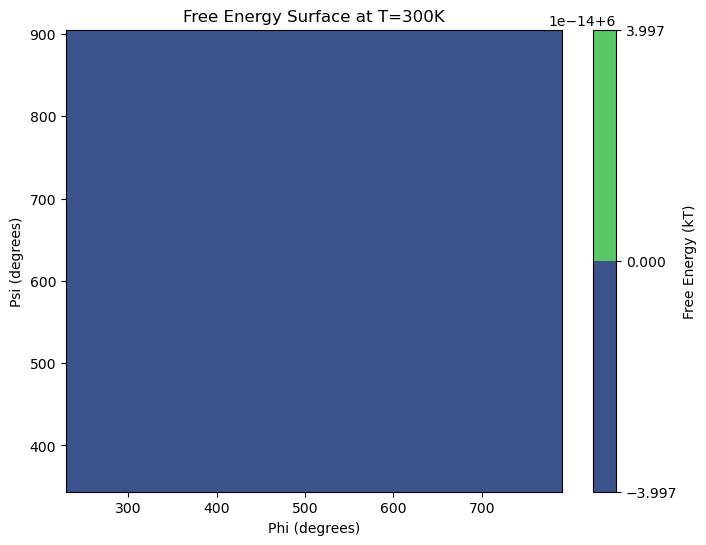

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the data as a 1D array
data = np.loadtxt('phi_psi_300.txt')
print("Original data shape:", data.shape)

# Reshape the data to ensure it's in two columns (phi, psi)
# Assuming the number of data points is even, and every two consecutive values represent (phi, psi)
data = data.reshape(-1, 2)
print("Reshaped data shape:", data.shape)

# Extract phi and psi values
phi = data[:, 0]
psi = data[:, 1]

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(phi, psi, bins=50, density=True)

# Compute the free energy from the histogram
free_energy = -np.log(hist + 1e-10)  # Avoid log(0) issue
free_energy = np.clip(free_energy, None, 6)  # Set max free energy to 6 kT

# Create meshgrid for plotting
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])  # Corrected this line

# Plot the free energy surface
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, free_energy.T, levels=30, cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface at T=300K')
plt.show()


In [12]:
import mdtraj as md
import numpy as np

# Load trajectory and compute phi and psi
trajectory = md.load('trajectory.xtc', top='md.gro')
phi_indices = md.compute_phi(trajectory)
psi_indices = md.compute_psi(trajectory)

phi_angles = phi_indices[0] * (180 / np.pi)  # Convert to degrees
psi_angles = psi_indices[0] * (180 / np.pi)  # Convert to degrees

# Save the phi and psi angles
np.savetxt('phi_psi_300.txt', np.column_stack((phi_angles, psi_angles)))

FileNotFoundError: [Errno 2] No such file or directory: 'md.gro'

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_free_energy_surface(filename, temperature, max_kT=6, bins=50):
    # Load the data (assuming phi and psi values are stored in two columns)
    data = np.loadtxt(filename)
    
    # Reshape data to two columns if needed
    if data.ndim == 1:
        data = data.reshape(-1, 2)
    
    phi = data[:, 0]
    psi = data[:, 1]
    
    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(phi, psi, bins=bins, density=True)
    
    # Compute the free energy from the histogram
    free_energy = -np.log(hist + 1e-10)  # Avoid log(0) issue
    free_energy = np.clip(free_energy, None, max_kT)  # Set max free energy to 6 kT
    
    # Create meshgrid for plotting
    X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
    
    # Plot the free energy surface
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, free_energy.T, levels=30, cmap='viridis')
    plt.colorbar(label='Free Energy (kT)')
    plt.xlabel('Phi (degrees)')
    plt.ylabel('Psi (degrees)')
    plt.title(f'Free Energy Surface at T={temperature}K')
    plt.show()

# Plot free energy surface for T=300
plot_free_energy_surface('phi_psi_T300.txt', 300)



OSError: phi_psi_T300.txt not found.

In [16]:
import mdtraj as md
import numpy as np

# Load trajectory and compute phi and psi
trajectory = md.load('adp_exchange3temps.xtc', top='adp.gro')
phi_indices = md.compute_phi(trajectory)
psi_indices = md.compute_psi(trajectory)

phi_angles = phi_indices[0] * (180 / np.pi)  # Convert to degrees
psi_angles = psi_indices[0] * (180 / np.pi)  # Convert to degrees

# Save the phi and psi angles
np.savetxt('phi_psi_300.txt', np.column_stack((phi_angles, psi_angles)))

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_free_energy_surface(filename, temperature, max_kT=6, bins=50):
    # Load the data (assuming phi and psi values are stored in two columns)
    data = np.phi_psi_300(filename)
    
    # Reshape data to two columns if needed
    if data.ndim == 1:
        data = data.reshape(-1, 2)
    
    phi = data[:, 0]
    psi = data[:, 1]
    
    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(phi, psi, bins=bins, density=True)
    
    # Compute the free energy from the histogram
    free_energy = -np.log(hist + 1e-10)  # Avoid log(0) issue
    free_energy = np.clip(free_energy, None, max_kT)  # Set max free energy to 6 kT
    
    # Create meshgrid for plotting
    X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
    
    # Plot the free energy surface
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, free_energy.T, levels=30, cmap='viridis')
    plt.colorbar(label='Free Energy (kT)')
    plt.xlabel('Phi (degrees)')
    plt.ylabel('Psi (degrees)')
    plt.title(f'Free Energy Surface at T={temperature}K')
    plt.show()

# Plot free energy surface for T=300
plot_free_energy_surface('phi_psi_T300.txt', 300)

AttributeError: module 'numpy' has no attribute 'phi_psi_300'

In [20]:
import mdtraj as md
import numpy as np

# Load trajectory and compute phi and psi
trajectory = md.load('adp_exchange3temps.xtc', top='adp.gro')
phi_indices = md.compute_phi(trajectory)
psi_indices = md.compute_psi(trajectory)

phi_angles = phi_indices[0] * (180 / np.pi)  # Convert to degrees
psi_angles = psi_indices[0] * (180 / np.pi)  # Convert to degrees

# Save the phi and psi angles
np.savetxt('phi_psi_400.txt', np.column_stack((phi_angles, psi_angles)))

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_free_energy_surface(filename, temperature, max_kT=6, bins=50):
    # Load the data for phi and psi angles
    data = np.loadtxt(filename)
    
    # Reshape the data if necessary (assuming 1D array, alternating phi and psi)
    if data.ndim == 1:
        data = data.reshape(-1, 2)
    
    phi = data[:, 0]
    psi = data[:, 1]
    
    # Create a 2D histogram of the phi and psi angles
    hist, xedges, yedges = np.histogram2d(phi, psi, bins=bins, density=True)
    
    # Convert the histogram to a free energy surface: F = -kT * ln(P)
    # Add a small constant to avoid taking log(0)
    free_energy = -np.log(hist + 1e-10)
    free_energy = np.clip(free_energy, None, max_kT)  # Cap the maximum free energy at 6 kT
    
    # Create a meshgrid for plotting
    X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
    
    # Plot the free energy surface
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, free_energy.T, levels=30, cmap='viridis')
    plt.colorbar(label='Free Energy (kT)')
    plt.xlabel('Phi (degrees)')
    plt.ylabel('Psi (degrees)')
    plt.title(f'Free Energy Surface at T={temperature}K')
    plt.show()

# Generate and plot the free energy surface for T=300
plot_free_energy_surface('phi_psi_T300.txt', 300)

# Generate and plot the free energy surface for other temperatures (T=350, T=400, etc.)
plot_free_energy_surface('phi_psi_T400.txt', 400)
plot_free_energy_surface('phi_psi_T600.txt', 600)


OSError: phi_psi_T300.txt not found.

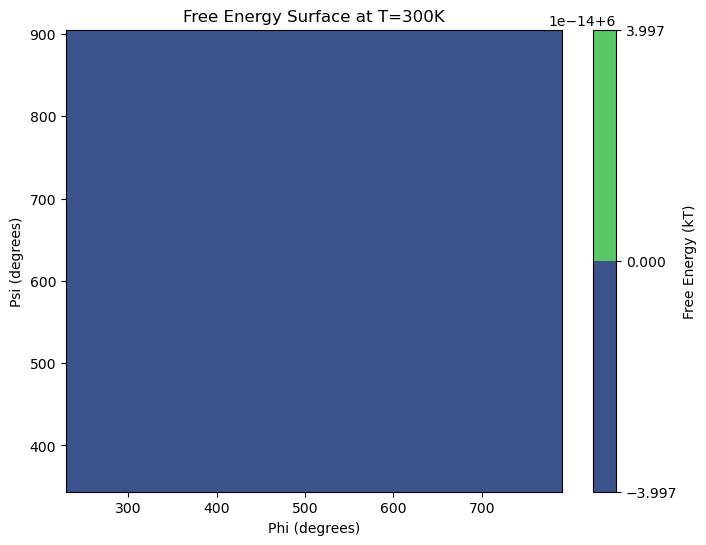

In [24]:
plot_free_energy_surface('phi_psi_300.txt', 300)


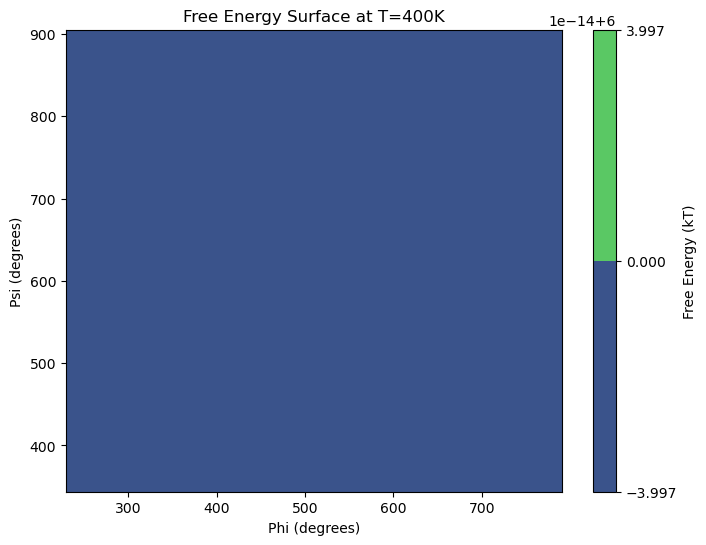

In [25]:
plot_free_energy_surface('phi_psi_400.txt', 400)

In [26]:
plot_free_energy_surface('phi_psi_600.txt', 400)

OSError: phi_psi_600.txt not found.